In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
img = Image.open("mesh2.jpg",)
arr = np.array(img)


In [3]:
print(arr.shape)

(967, 813, 3)


In [4]:
arr = arr.sum(axis=-1) // 3

<BarContainer object of 256 artists>

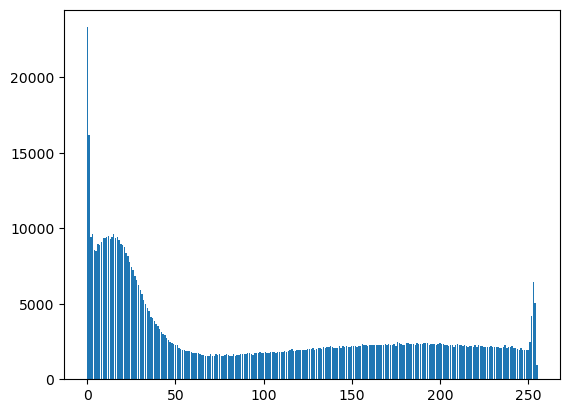

In [5]:
plt.bar(range(256), np.histogram(arr, bins=256)[0])

In [27]:
hist = np.histogram(arr, bins=256)[0]

In [28]:
hist[hist == 0] = sum(hist)/len(hist)

In [35]:
40 + np.argmin(hist[40:100])

72

In [36]:
arr_b = arr < 72

In [37]:
np.sum(arr_b == False) / (arr_b.shape[0]*arr_b.shape[1])

0.49541003165977887

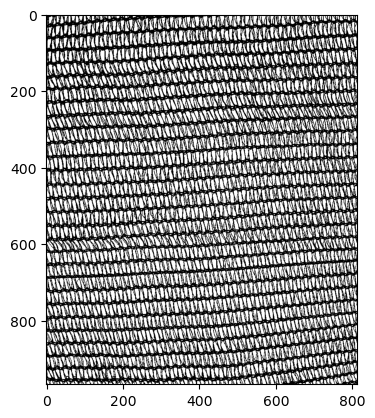

In [38]:
plt.imshow(arr_b, cmap="gray")

In [ ]:
c = np.sum(arr_b == False) / (arr_b.shape[0]*arr_b.shape[1])
for i in range(100000):
    x,y = np.random.randint(0, arr.shape[0]), np.random.randint(0, arr.shape[1])
    size = np.random.randint(100, 600)
    xf = x+size if x+size < arr.shape[0] else arr.shape[0]
    yf = y+size if y+size < arr.shape[1] else arr.shape[1]
    piece = arr_b[x:xf, y:yf]
    c = (c + np.sum(piece == False) / (piece.shape[0]*piece.shape[1])) / 2

In [ ]:
c